## Class 1 - Formulating a modeling problem
In our first lecture, we discussed a few overarching points related to this course. Let's do a quick recap:
- The core of this course will be devoted to exploring ways in which we can extract knowledge from data;
- This relies on the fact that we need to be able to "ask questions" to our data;
- Most of these questions will revolve around learning a mathematical or algorithmic model of relations between some features and an outcome, or, when no outcome is available, learning "structures" within our feature space;
- We can do so for two (not mutually exclusive) reasons: to be able to infer the outcome from the features we can observe or to understand how and why inputs and outcomes are related;
- Here, we will mostly focus on developing models which are **good at inferring outcomes from features** in new data.


We emphasized that an important skill for a data scientist is that of being able to identify **questions** that can be answered with data. Let's start getting our hands dirty with this in this first class. Today, the focus will be formulating an interesting predictive questions based on a dataset of your own choice.

### Structure of today's exercise
For this class, your goal is to perform the following tasks:
1. Together with your group, choose one of these datasets (or find a new one)
    - HippoCorpus (a dataset of recalled or imagined stories, paired with a number of story- and participant-related metadata: https://www.kaggle.com/datasets/saurabhshahane/hippocorpus)
    - EEG Psychiatric Disorders Dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset?resource=download (from this paper: https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.707581/full)
    - Personalities and random number choices from OpenPsychometrics: https://openpsychometrics.org/_rawdata/ (search for "random numbers")
    - A large-scale data set containing data from a bike-sharing service and weather information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset.

2. Load the corresponding data, which you will find under `Project Files/data` using `pandas`

3. Using `pandas` and `seaborn`, get a grasp of the overall characteristics of the dataset:
    - What is the size of your dataset, and how many features are available? 
        - Hint: Use `DataFrame.shape` from `pandas`
    - What kind of information do the columns include?
        - Hint: Read the dataset's documentation + associated papers. Methods like `.info()` or `.describe()` could also be useful.
    - What *types* of variables does each of the column contain? What kind of values do we expect to find in each column?
        - Hint: to extract this information analytically, look into `pandas` `dtype`, `unique`, and `min`/`max` functions
        - To plot this information, use `seaborn` functions (`displot`, `pointplot`, `catplot` or `boxplot` could be helpful)
    - What is the proportion of missing values for each column? Is there any column with a worryingly high proportion of missing values?
        - Hint: use the `.isnull()` method and aggregate over rows using `.sum()`
    - What is the proportion of missing values for each row? Is there any row with a worryingly high proportion of missing values?
        - Hint: very similar to what you did above
    - Is there any very apparent structure in your data, e.g., clusters of highly correlated features? 
        - Hint: use pandas `.corr()` and seaborn `clustermap` to look into that: https://seaborn.pydata.org/generated/seaborn.clustermap.html

4. Think about what information the dataset contains, and formulate one of the following:
    - A prediction question that can be addressed in terms of predictive performance in a regression task;
    - A prediction question that can be addressed in terms of predictive performance in a classification task

5. For the regression OR classification task you have formulated, answer the following questions:
    - What kind of metric can you use to assess whether the model predicts successfully?
    - What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
    - What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
    - Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
        - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots 
        (e.g., visualizing relations between variables)

## Bike dataset

In [3]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_11750/1463386325.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
bikes = ('/work/Project Files/data/class_01/bikes.csv')
bikes = pd.read_csv(bikes)

In [13]:
print("The shape of the bike dataset is {} and the number of features are {}".format(bikes.shape[0], bikes.shape[1]))

The shape of the bike dataset is 17379 and the number of features are 17


In [15]:
# list all the features in the bikes dataset
print("The features in the bikes dataset are: \n{}".format(bikes.columns))

The features in the bikes dataset are: 
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [25]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# variable types and expected values
variable_info = []

for column in bikes.columns:
    variable_type = bikes[column].dtype
    unique_values = bikes[column].unique()
    
    # Check if the column is numeric before calculating min and max
    if pd.api.types.is_numeric_dtype(bikes[column]):
        min_value = bikes[column].min()
        max_value = bikes[column].max()
    else:
        min_value = None
        max_value = None
    
    variable_info.append({
        'Column': column,
        'Variable Type': variable_type,
        'Unique Values': unique_values,
        'Min Value': min_value,
        'Max Value': max_value
    })

# Display the information
variable_info_df = pd.DataFrame(variable_info)
display(variable_info_df)

,Column,Variable Type,Unique Values,Min Value,Max Value
0,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.00,17379.0000
1,dteday,object,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...",NaN,NaN
2,season,int64,"[1, 2, 3, 4]",1.00,4.0000
3,yr,int64,"[0, 1]",0.00,1.0000
4,mnth,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1.00,12.0000
5,hr,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.00,23.0000
6,holiday,int64,"[0, 1]",0.00,1.0000
7,weekday,int64,"[6, 0, 1, 2, 3, 4, 5]",0.00,6.0000
8,workingday,int64,"[0, 1]",0.00,1.0000
9,weathersit,int64,"[1, 2, 3, 4]",1.00,4.0000


In [26]:
# variable types and expected values
variable_info = []

for column in bikes.columns:
    variable_type = bikes[column].dtype
    unique_values = bikes[column].unique()
    
    # Check if the column is numeric before calculating min and max
    if pd.api.types.is_numeric_dtype(bikes[column]):
        min_value = bikes[column].min()
        max_value = bikes[column].max()
    else:
        min_value = None
        max_value = None
    
    variable_info.append({
        'Column': column,
        'Variable Type': variable_type,
        'Unique Values': unique_values,
        'Min Value': min_value,
        'Max Value': max_value
    })

# Display the information
variable_info_df = pd.DataFrame(variable_info)
display(variable_info_df)

,Column,Variable Type,Unique Values,Min Value,Max Value
0,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.00,17379.0000
1,dteday,object,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...",NaN,NaN
2,season,int64,"[1, 2, 3, 4]",1.00,4.0000
3,yr,int64,"[0, 1]",0.00,1.0000
4,mnth,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1.00,12.0000
5,hr,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.00,23.0000
6,holiday,int64,"[0, 1]",0.00,1.0000
7,weekday,int64,"[6, 0, 1, 2, 3, 4, 5]",0.00,6.0000
8,workingday,int64,"[0, 1]",0.00,1.0000
9,weathersit,int64,"[1, 2, 3, 4]",1.00,4.0000


In [8]:
selected_columns = ['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered','cnt']

In [ ]:
# for each column, calculate the proportion of missing values
missing_proportions = bikes.isnull().mean() 

In [ ]:
missing_table = pd.DataFrame({
    'Column': missing_proportions.index,
    'Missing Proportion': missing_proportions.values
})

missing_table = missing_table.sort_values(by='Missing Proportion', ascending=False)
print(missing_table)


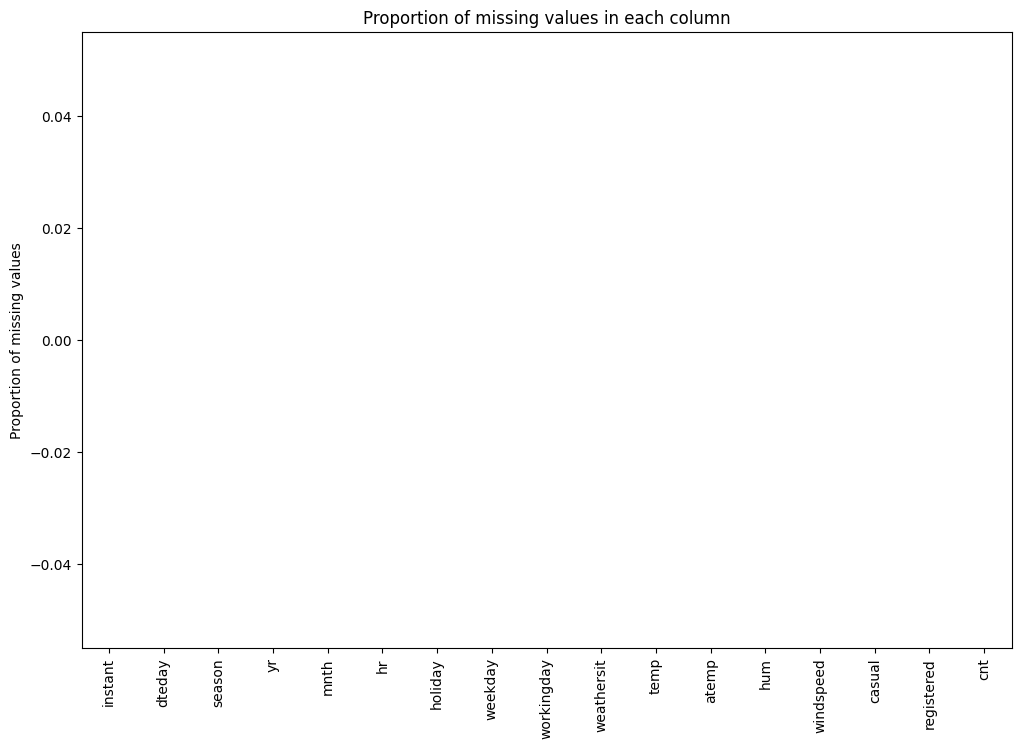

In [9]:
# plot the proportion of missing values for each column
# add percentage sign to y-axis labels
plt.figure(figsize=(12, 8))
missing_proportions.plot(kind='bar')
plt.ylabel('Proportion of missing values')
# plt.xticks(rotation=45)
plt.title('Proportion of missing values in each column')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

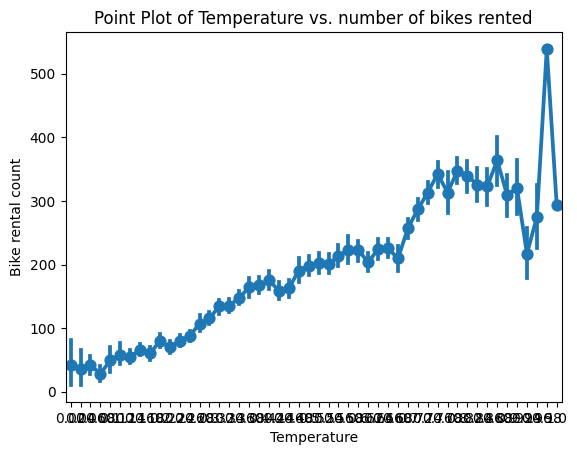

In [21]:
sns.pointplot(x='temp',
    y='cnt',
    data=bikes)
plt.xlabel('Temperature')
plt.ylabel('Bike rental count')
plt.title('Point Plot of Temperature vs. number of bikes rented')
plt.show


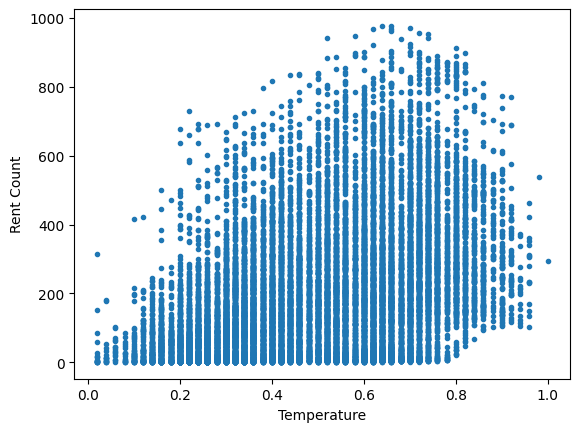

In [24]:
plt.figure()
plt.plot(bikes["temp"],
    bikes["cnt"],
    ".")
plt.xlabel("Temperature")
plt.ylabel("Rent Count")
plt.show()

In [11]:
# selecting only numeric columns
numeric_columns = bikes.select_dtypes(include=np.number)

# make the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# display the correlation matrix
print(correlation_matrix)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

<Figure size 1200x1000 with 0 Axes>

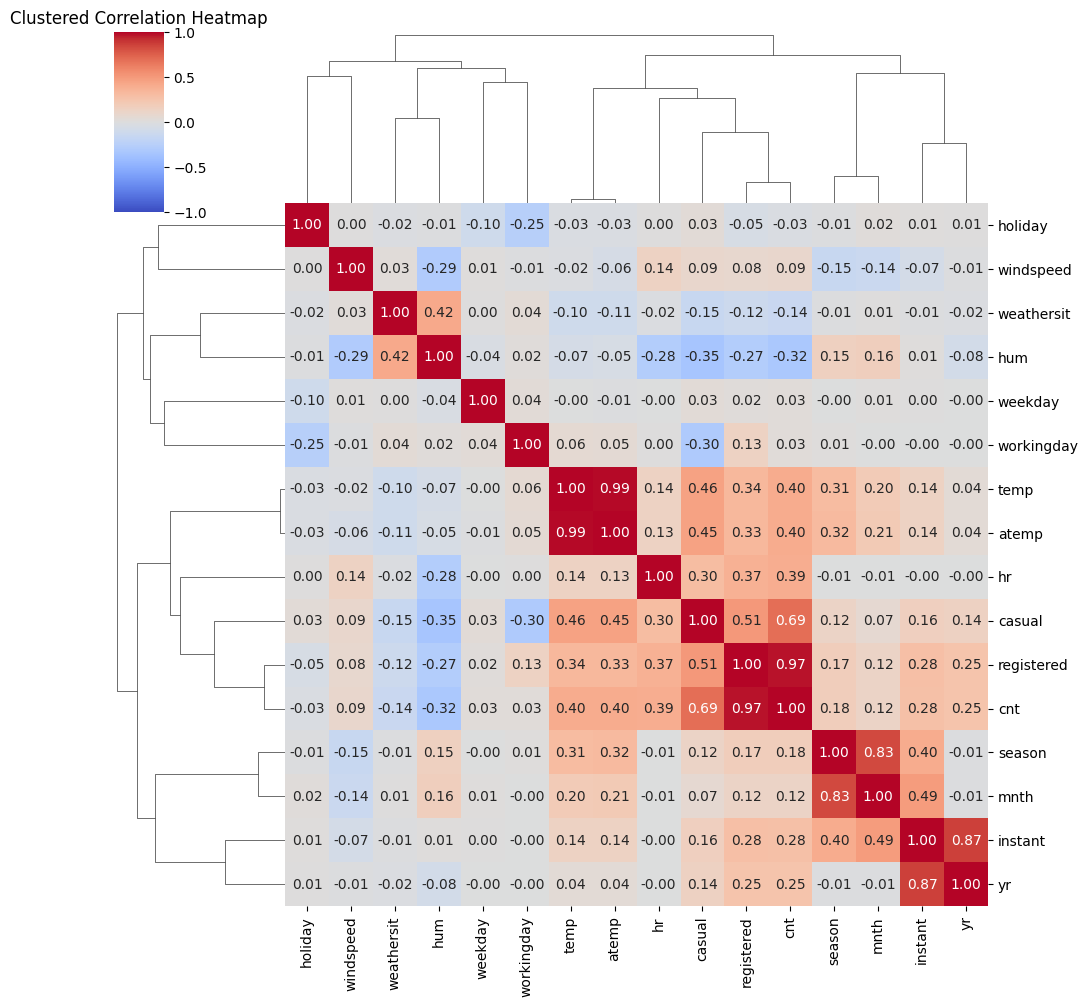

In [12]:
import scipy

# handling missing and infinite values
correlation_matrix_cleaned = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Create a clustered heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix_cleaned, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Clustered Correlation Heatmap')
plt.show()

In [27]:
# setting up a 3-column grid for boxplots
num_plots = len(numeric_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# flatten the axes array to handle the case when there's only one row
axes = axes.flatten()

# choose color palette
color_palette = "Set3"

# plotting boxplots for each numeric variable in a 3-column grid
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_hippocorpus[column], ax=axes[i], palette=color_palette)
    axes[i].set_title(f'Boxplot for {column}')

# remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

: 

: 

## 4. Think about what information the dataset contains, and formulate one of the following:
`Prediction task`:
A prediction question that can be addressed in terms of predictive performance in a regression task: predicting the number of bikes rented on a particular day given the weather (many highly correlated weather variables could be used, or they could be combined)?

For the regression OR classification task you have formulated, answer the following questions:
    - What kind of metric can you use to assess whether the model predicts successfully?
        - Mean Squared Error (MSE): common metric of how well a model’s predictions match observed data is the. You can calculate both the training set MSE and the test set MSE (the latter is often much larger). As model flexibility increases, the training MSE will decrease, but the test MSE may not - due to overfitting. A good thing about using MSE metric: it gives you direct interpretation of your results!
    - What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
        - average of the target in the training data (mean count)
    - What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
        - 
    - Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
        - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots 
        (e.g., visualizing relations between variables)


`Classification`
A prediction question that can be addressed in terms of predictive performance in a classification task: ??  


### Once you have done this
1. Share your answers to 4 and 5 on the Brightspace Padlet
2. Keep your notebooks, I will ask you to briefly run us through them!
3. Next week, we will select a subset of your questions, and work on them for the first few weeks